In [364]:
import torch
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time 

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()
wine_df=pd.DataFrame(data=np.c_[wine['data'],wine['target']],
                  columns=wine['feature_names']+['target'])

wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [19]:
wine_df['target'].unique()

array([0., 1., 2.])

In [314]:
wine_df['target'].describe()

count    178.000000
mean       0.938202
std        0.775035
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: target, dtype: float64

In [4]:
wine_ser = pd.Series(wine)
wine_ser

data             [[14.23, 1.71, 2.43, 15.6, 127.0, 2.8, 3.06, 0...
target           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
frame                                                         None
target_names                           [class_0, class_1, class_2]
DESCR            .. _wine_dataset:\n\nWine recognition dataset\...
feature_names    [alcohol, malic_acid, ash, alcalinity_of_ash, ...
dtype: object

## Test1
### changing number of neurons in the fully connected layers
### using all 13 features of wine dataset
### keeping another parameters the same

In [227]:
info = []

In [234]:
temp = []
features = 13
temp.append(features)

X_train, X_test, y_train, y_test = train_test_split(
    wine.data[:, :13], 
    wine.target, 
    test_size=0.3, 
    shuffle=True)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [235]:
class WineNet(torch.nn.Module):
    def __init__(self,n_input, n_hidden_neurons):
        super(WineNet, self).__init__()
        self.fc1 = torch.nn.Linear(n_input, n_hidden_neurons)
        self.activ1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
#             
        self.sm = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x

# min number of input neurons = 13 ('cause of 13 used features)
n_input = 13
n_hidden = 1

temp.append(n_input)
temp.append(n_hidden)

wine_net = WineNet(n_input, n_hidden)

In [236]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(wine_net.parameters(), lr=1.0e-3)

In [237]:
batch_size = 10
temp.append(batch_size)

for epoch in range(2000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = wine_net.forward(x_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    if epoch % 10 == 0:
        test_preds = wine_net.forward(X_test)
#         print(test_preds)
        test_preds = test_preds.argmax(dim=1)
#         print(test_preds)

In [238]:
# print(wine_net.fc1.in_features, np.asarray((test_preds == y_test).float().mean()) > 0.8)

prob_value = np.asarray((test_preds == y_test).float().mean())
temp.append(prob_value)

print(wine_net.fc1.in_features, prob_value > 0.8)

# need to get 13 True

13 False


In [239]:
info.append(temp)

In [ ]:
# additional calc with 1-2 neurons

In [240]:
df_temp = pd.DataFrame(info)
df_temp.columns = ['feature_number', 'input_neurons', 
              'hidden_neurons', 'batch_size', 'probability']
df_temp

,feature_number,input_neurons,hidden_neurons,batch_size,probability
0,13,13,2,10,0.46296296
1,13,13,1,10,0.4074074


In [ ]:
# calc with 3-19 (only uneven) neurons

In [225]:
df_analisys = pd.DataFrame(info)
df_analisys.columns = ['feature_number', 'input_neurons', 
              'hidden_neurons', 'batch_size', 'probability']
df_analisys

,feature_number,input_neurons,hidden_neurons,batch_size,probability
0,13,13,5,10,0.4814815
1,13,13,7,10,0.8888889
2,13,13,9,10,0.6481481
3,13,13,11,10,0.962963
4,13,13,13,10,0.7592593
5,13,13,15,10,0.962963
6,13,13,17,10,0.8703704
7,13,13,3,10,0.44444445
8,13,13,4,10,0.35185185


In [ ]:
# concatenate 2 previous df

In [244]:
df_data = pd.concat([df_analisys, df_temp], ignore_index=True)
df_data

,feature_number,input_neurons,hidden_neurons,batch_size,probability
0,13,13,5,10,0.4814815
1,13,13,7,10,0.8888889
2,13,13,9,10,0.6481481
3,13,13,11,10,0.962963
4,13,13,13,10,0.7592593
5,13,13,15,10,0.962963
6,13,13,17,10,0.8703704
7,13,13,3,10,0.44444445
8,13,13,4,10,0.35185185
9,13,13,2,10,0.46296296


Text(0, 0.5, 'Accuracy')

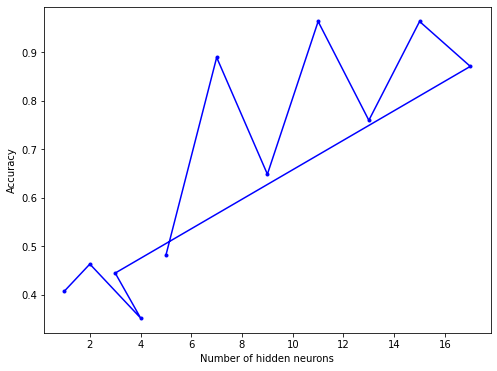

In [308]:
fig = plt.figure(figsize=(8,6))
plt.plot(df_data['hidden_neurons'], df_data['probability'], 'b.-') 

plt.xlabel('Number of hidden neurons')
plt.ylabel('Accuracy')

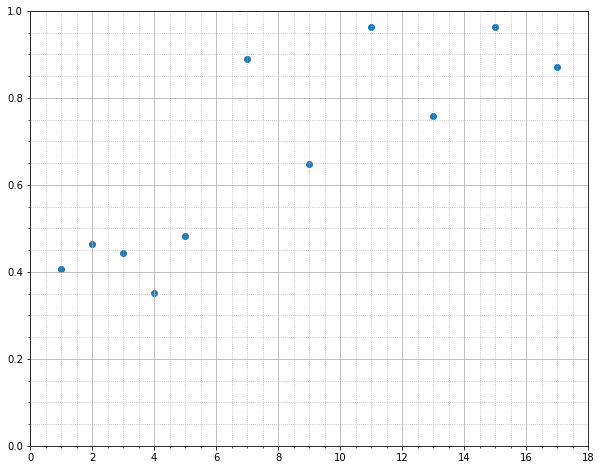

In [302]:
plt.rcParams ['figure.figsize'] = [10, 8]

plt.scatter(df_data['hidden_neurons'], df_data['probability']) 

# включаем дополнительные отметки на осях
plt.minorticks_on()

plt.xlim([0., 18.])
plt.ylim([0., 1.])

# включаем основную сетку
plt.grid(which='major')

# включаем дополнительную сетку
plt.grid(which='minor', linestyle=':')

# оптимизируем поля и расположение объектов
# plt.tight_layout()

In [ ]:
# other data

In [226]:
df_analisys1 = df_analisys.copy(deep=True)
df_analisys1

,feature_number,input_neurons,hidden_neurons,batch_size,probability
0,13,13,5,10,0.4814815
1,13,13,7,10,0.8888889
2,13,13,9,10,0.6481481
3,13,13,11,10,0.962963
4,13,13,13,10,0.7592593
5,13,13,15,10,0.962963
6,13,13,17,10,0.8703704
7,13,13,3,10,0.44444445
8,13,13,4,10,0.35185185


In [57]:
# np.asarray((test_preds == y_test).float().mean())

array(1., dtype=float32)

In [56]:
# prob_value

array(1., dtype=float32)

In [160]:
# temp

[13, 13, 14, 10, array(0.9814815, dtype=float32)]

## Test2
### changing test_size in train_test_split
### get base rate 
### find out which test_size gets worse prediction than raye base

In [ ]:
# Base Rate - значение accuracy для случая, когда модель для всех объектов предсказывает 
# самый частотный класс в датасете

In [325]:
wine_df.shape

(178, 14)

In [323]:
wine_df.target.value_counts()

1.0    71
0.0    59
2.0    48
Name: target, dtype: int64

In [347]:
base_rate = 71/178
base_rate

0.398876404494382

In [338]:
info = []
test_data = 0.1

for i in range(0, 9):
    temp = []   
    features = 13

    X_train, X_test, y_train, y_test = train_test_split(
        wine.data[:, :13], 
        wine.target, 
        test_size=test_data, 
        shuffle=True)

    X_train = torch.FloatTensor(X_train)
    X_test = torch.FloatTensor(X_test)
    y_train = torch.LongTensor(y_train)
    y_test = torch.LongTensor(y_test)

    temp.append(test_data)
    test_data += 0.1
    
    
    class WineNet(torch.nn.Module):
        def __init__(self,n_input, n_hidden_neurons):
            super(WineNet, self).__init__()
            self.fc1 = torch.nn.Linear(n_input, n_hidden_neurons)
            self.activ1 = torch.nn.Sigmoid()
            self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
            self.activ2 = torch.nn.Sigmoid()
            self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
            self.sm = torch.nn.Softmax(dim=1)

        def forward(self, x):
            x = self.fc1(x)
            x = self.activ1(x)
            x = self.fc2(x)
            x = self.activ2(x)
            x = self.fc3(x)
            return x

        def inference(self, x):
            x = self.forward(x)
            x = self.sm(x)
            return x

    n_input = 13
    n_hidden = 8
    temp.append(n_input)
    temp.append(n_hidden)

    wine_net = WineNet(n_input, n_hidden)


    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(wine_net.parameters(), lr=1.0e-3)


    batch_size = 10
    temp.append(batch_size)

    for epoch in range(2000):
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()

            batch_indexes = order[start_index:start_index+batch_size]

            x_batch = X_train[batch_indexes]
            y_batch = y_train[batch_indexes]

            preds = wine_net.forward(x_batch) 

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()

        if epoch % 10 == 0:
            test_preds = wine_net.forward(X_test)
            test_preds = test_preds.argmax(dim=1)


    prob_value = np.asarray((test_preds == y_test).float().mean())
    temp.append(prob_value)

    info.append(temp)
    print(wine_net.fc1.in_features, prob_value > 0.8)

13 True
13 True
13 True
13 False
13 True
13 True
13 True
13 False
13 False


In [339]:
df_2 = pd.DataFrame(info)
df_2.columns = ['test_size', 'input_neurons', 
              'hidden_neurons', 'batch_size', 'probability']
df_2

,test_size,input_neurons,hidden_neurons,batch_size,probability
0,0.1,13,8,10,0.8888889
1,0.2,13,8,10,0.9722222
2,0.3,13,8,10,0.8518519
3,0.4,13,8,10,0.6527778
4,0.5,13,8,10,0.94382024
5,0.6,13,8,10,0.94392526
6,0.7,13,8,10,0.952
7,0.8,13,8,10,0.3986014
8,0.9,13,8,10,0.66459626


Text(0, 0.5, 'Accuracy')

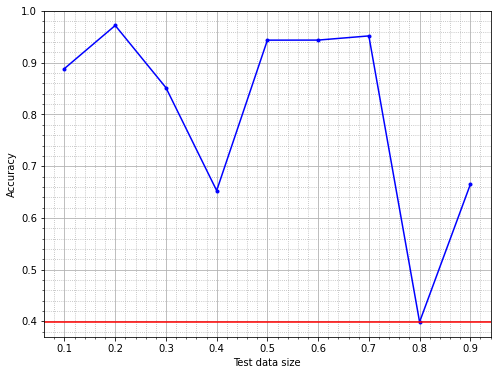

In [355]:
fig = plt.figure(figsize=(8,6))

plt.plot(df_2['test_size'], df_2['probability'], 'b.-') 
plt.axhline(y=base_rate, color='r')

plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

plt.xlabel('Test data size')
plt.ylabel('Accuracy')

(0.0, 1.0)

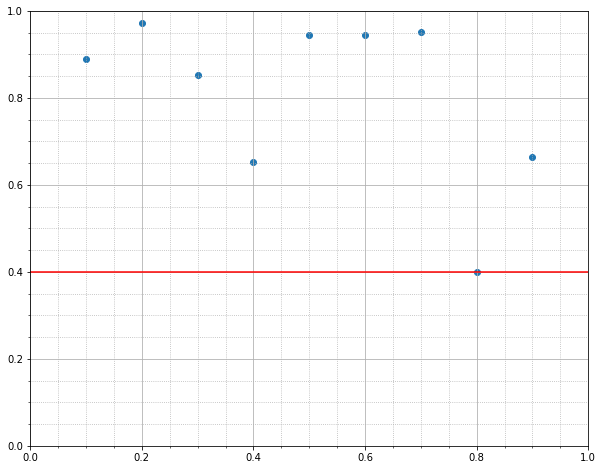

In [357]:
plt.scatter(df_2['test_size'], df_2['probability']) 
plt.axhline(y=base_rate, color='r')

plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

plt.xlim([0., 1.])
plt.ylim([0., 1.])

## Test3
### changing batch size
### does learning time depend on batch size in 1 epoch?

In [367]:
info = []
batch_temp = 10

for i in range(0, 9):
    temp = []   
    features = 13

    X_train, X_test, y_train, y_test = train_test_split(
        wine.data[:, :13], 
        wine.target, 
        test_size=0.2, 
        shuffle=True)

    X_train = torch.FloatTensor(X_train)
    X_test = torch.FloatTensor(X_test)
    y_train = torch.LongTensor(y_train)
    y_test = torch.LongTensor(y_test)
    
    
    class WineNet(torch.nn.Module):
        def __init__(self,n_input, n_hidden_neurons):
            super(WineNet, self).__init__()
            self.fc1 = torch.nn.Linear(n_input, n_hidden_neurons)
            self.activ1 = torch.nn.Sigmoid()
            self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
            self.activ2 = torch.nn.Sigmoid()
            self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
            self.sm = torch.nn.Softmax(dim=1)

        def forward(self, x):
            x = self.fc1(x)
            x = self.activ1(x)
            x = self.fc2(x)
            x = self.activ2(x)
            x = self.fc3(x)
            return x

        def inference(self, x):
            x = self.forward(x)
            x = self.sm(x)
            return x

    n_input = 13
    n_hidden = 8

    wine_net = WineNet(n_input, n_hidden)


    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(wine_net.parameters(), lr=1.0e-3)


    batch_size = batch_temp
    temp.append(batch_size)
    batch_temp += 10

    
    start = time.time()
    for epoch in range(2000):
        order = np.random.permutation(len(X_train))
        
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()

            batch_indexes = order[start_index:start_index+batch_size]

            x_batch = X_train[batch_indexes]
            y_batch = y_train[batch_indexes]

            preds = wine_net.forward(x_batch) 

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()
            
        if epoch % 10 == 0:
            test_preds = wine_net.forward(X_test)
            test_preds = test_preds.argmax(dim=1)

            
    end = time.time() - start
    temp.append(end)

    
    prob_value = np.asarray((test_preds == y_test).float().mean())
    temp.append(prob_value)

    info.append(temp)
    print(wine_net.fc1.in_features, prob_value > 0.8)

13 False
13 True
13 True
13 False
13 False
13 True
13 True
13 True
13 True


In [368]:
df_3 = pd.DataFrame(info)
df_3.columns = ['batch_size', 'epoch_time', 'probability']
df_3

,batch_size,epoch_time,probability
0,10,81.645108,0.6666667
1,20,45.960684,0.8055556
2,30,27.221370,0.9722222
3,40,22.456666,0.6666667
4,50,17.086190,0.41666666
5,60,17.309105,0.9722222
6,70,16.990849,0.9722222
7,80,11.598495,0.8055556
8,90,11.448942,0.9444444


In [ ]:
# batch_size - probability

Text(0, 0.5, 'Accuracy')

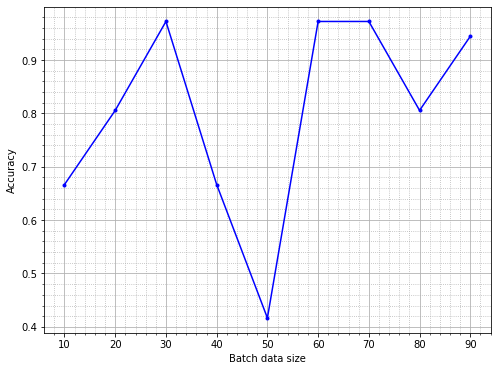

In [369]:
fig = plt.figure(figsize=(8,6))

plt.plot(df_3['batch_size'], df_3['probability'], 'b.-') 

plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

plt.xlabel('Batch data size')
plt.ylabel('Accuracy')

(0.0, 1.0)

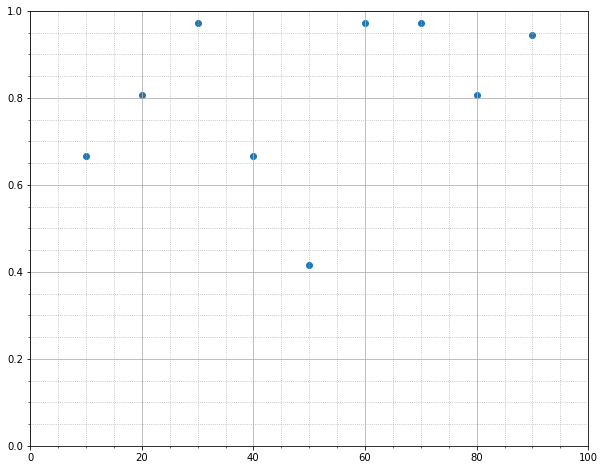

In [370]:
plt.scatter(df_3['batch_size'], df_3['probability']) 

plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

plt.xlim([0., 100.])
plt.ylim([0., 1.])

In [ ]:
# batch size- epoch_time

Text(0, 0.5, 'Accuracy')

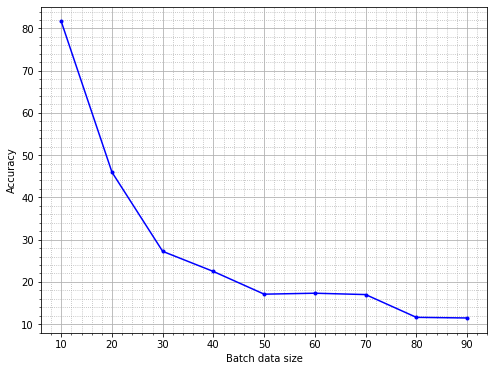

In [371]:
fig = plt.figure(figsize=(8,6))

plt.plot(df_3['batch_size'], df_3['epoch_time'], 'b.-') 

plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

plt.xlabel('Batch data size')
plt.ylabel('Accuracy')